<a href="https://colab.research.google.com/github/charlesdgburns/NM_TinyRNN/blob/main/notebooks/nm_tinyrnn_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Let's use this as a learning notebook about different RNN architectures.
We want to start from scratch and get an idea of how different architectures work before fitting to some data.


We the fit these to sequential behavioural decision making later.


In [1]:
## setup on google colab:

!git clone https://github.com/charlesdgburns/NM_TinyRNN.git
from pathlib import Path
CODE_DIR = Path('.')
SAVE_PATH = CODE_DIR/'NM_TinyRNN/data/rnns'
DATA_PATH = './NM_TinyRNN/data/AB_behaviour/WS16'


fatal: destination path 'NM_TinyRNN' already exists and is not an empty directory.


In [44]:
# set paths not on google colab
from pathlib import Path
import os
#CODE_DIR = Path(Path(r'.'))
#os.chdir(CODE_DIR)
CODE_DIR = Path('.')
SAVE_PATH = CODE_DIR/'NM_TinyRNN/data/rnns'
DATA_PATH = './NM_TinyRNN/data/AB_behaviour/WS16'


In [45]:
# Import packages and local code
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from NM_TinyRNN.code.models import training
from NM_TinyRNN.code.models import datasets
from NM_TinyRNN.code.models import rnns
from NM_TinyRNN.code.models import parallelised_training as pat
from importlib import reload #for active development


In [ ]:
# Train some models using the standard code
reload(training)
reload(datasets)

CODE_DIR = Path('.')
SAVE_PATH = CODE_DIR/'NM_TinyRNN/data/rnns'
DATA_PATH = './NM_TinyRNN/data/AB_behaviour/WS16'
SEQUENCE_LENGTH = 150+1 # sequence length for batched training


dataset = datasets.AB_Dataset(DATA_PATH, SEQUENCE_LENGTH)
model = rnns.TinyRNN(input_size=3, # past forced choice, past choice, past outcome, 
                     hidden_size=2, # hidden unit
                     out_size=2, # one-hot code for choice A, choice B
                     rnn_type='NMRNN', # GRU, LSTM, NMRNN, vanilla,
                     nm_mode = 'column',
                     nm_dim=2,
                     nm_size=2
                     )
trainer = training.Trainer(SAVE_PATH)
training_losses_df = trainer.fit(model,dataset)


Starting training with 6 sparsity values...
Dataset size: 51
Split sizes - Train: 40, Val: 5, Test: 6

Training with sparsity lambda = 1


λ=1e+00:  30%|█████████████████████████████████████████████▌                                                                                                          | 3/10 [00:01<00:03,  1.77it/s]


Early stopping after 4 epochs

Training with sparsity lambda = 0.1


λ=1e-01:  40%|████████████████████████████████████████████████████████████▊                                                                                           | 4/10 [00:01<00:02,  2.03it/s]


Early stopping after 5 epochs

Training with sparsity lambda = 0.01


λ=1e-02: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.59it/s]



Training with sparsity lambda = 0.001


λ=1e-03: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.58it/s]



Training with sparsity lambda = 0.0001


λ=1e-04: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.59it/s]



Training with sparsity lambda = 1e-05


λ=1e-05: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.55it/s]



Evaluating best model (λ=1e-04) on test set...
Evaluation loss: 0.621324

Training complete!
Best model (λ=1e-04) saved to: NM_TinyRNN/data/rnns
Best validation loss: 0.631838
Test loss: 0.621324
Lastly, extracting activations on full dataset
0.559459


In [170]:
from NM_TinyRNN.code.models import parallelised_training as pat

#info_df = pat.get_train_info_df()
#for train_info in info_df.itertuples():
#    pat.train_model_AB(train_info.data_path,str(train_info.save_path),train_info.model_type,train_info.hidden_size,train_info.nm_size,train_info.nm_dim,train_info.nm_mode)
#    break

info_df = pat.get_train_info_df()
info_df

,subject_ID,model_type,hidden_size,nm_size,nm_dim,nm_mode,model_id,save_path,data_path,completed
0,WS16,vanilla,1,1,1,row,1_unit_vanilla,NM_TinyRNN/data/rnns/vanilla,NM_TinyRNN/data/AB_behaviour/WS16,True
1,WS16,vanilla,2,1,1,row,2_unit_vanilla,NM_TinyRNN/data/rnns/vanilla,NM_TinyRNN/data/AB_behaviour/WS16,True
2,WS16,GRU,1,1,1,row,1_unit_GRU,NM_TinyRNN/data/rnns/GRU,NM_TinyRNN/data/AB_behaviour/WS16,True
3,WS16,GRU,2,1,1,row,2_unit_GRU,NM_TinyRNN/data/rnns/GRU,NM_TinyRNN/data/AB_behaviour/WS16,True
4,WS16,LSTM,1,1,1,row,1_unit_LSTM,NM_TinyRNN/data/rnns/LSTM,NM_TinyRNN/data/AB_behaviour/WS16,True
5,WS16,LSTM,2,1,1,row,2_unit_LSTM,NM_TinyRNN/data/rnns/LSTM,NM_TinyRNN/data/AB_behaviour/WS16,True
6,WS16,NMRNN,1,1,1,row,1_unit_NMRNN_1_subunits_1_row,NM_TinyRNN/data/rnns/NMRNN/row,NM_TinyRNN/data/AB_behaviour/WS16,True
7,WS16,NMRNN,1,2,1,row,1_unit_NMRNN_2_subunits_1_row,NM_TinyRNN/data/rnns/NMRNN/row,NM_TinyRNN/data/AB_behaviour/WS16,True
8,WS16,NMRNN,2,1,1,low_rank,2_unit_NMRNN_1_subunits_1_low_rank,NM_TinyRNN/data/rnns/NMRNN/low_rank,NM_TinyRNN/data/AB_behaviour/WS16,True
9,WS16,NMRNN,2,1,1,row,2_unit_NMRNN_1_subunits_1_row,NM_TinyRNN/data/rnns/NMRNN/row,NM_TinyRNN/data/AB_behaviour/WS16,True


In [177]:
from NM_TinyRNN.code.models import parallelised_training as pat
reload(pat)
pat.run_training(overwrite=True)

Submitting model training for WS16 to HPC
Submitted batch job 1248141
Submitting model training for WS16 to HPC
Submitted batch job 1248142
Submitting model training for WS16 to HPC
Submitted batch job 1248143
Submitting model training for WS16 to HPC
Submitted batch job 1248144
Submitting model training for WS16 to HPC
Submitted batch job 1248145
Submitting model training for WS16 to HPC
Submitted batch job 1248146
Submitting model training for WS16 to HPC
Submitted batch job 1248147
Submitting model training for WS16 to HPC
Submitted batch job 1248148
Submitting model training for WS16 to HPC
Submitted batch job 1248149
Submitting model training for WS16 to HPC
Submitted batch job 1248150
Submitting model training for WS16 to HPC
Submitted batch job 1248151
Submitting model training for WS16 to HPC
Submitted batch job 1248152
Submitting model training for WS16 to HPC
Submitted batch job 1248153
Submitting model training for WS16 to HPC
Submitted batch job 1248154
Submitting model tra

In [175]:
!squeue -u cburns -p cpu

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           1246444       cpu     bash   cburns  R    5:52:59      1 enc3-node2
           1244718       cpu     bash   cburns  R    9:41:39      1 enc3-node2
           1244662       cpu     bash   cburns  R   10:40:02      1 enc1-node1


Index(['sparsity_lambda', 'epoch', 'val_pred_loss', 'train_pred_loss',
       'train_sparsity_loss'],
      dtype='object')


<Axes: xlabel='epoch', ylabel='train_sparsity_loss'>

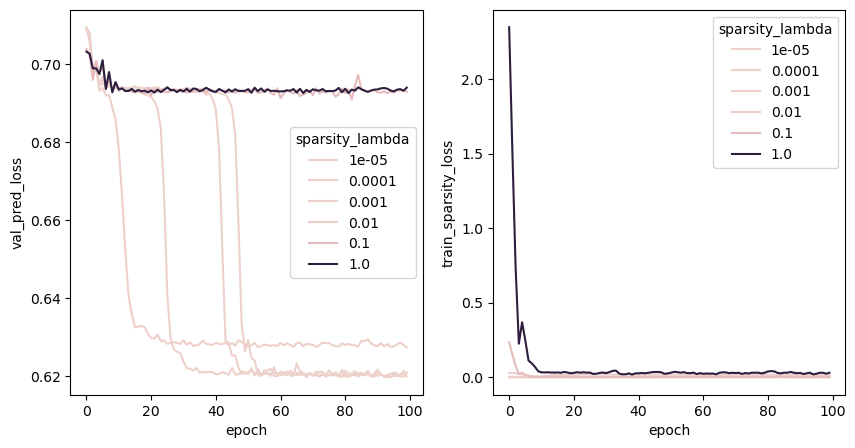

In [79]:
import seaborn as sns
print(training_losses_df.columns)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.lineplot(training_losses_df, 
             x= 'epoch', 
             y='val_pred_loss',
             hue='sparsity_lambda', ax = ax[0])
sns.lineplot(training_losses_df, x = 'epoch',y='train_sparsity_loss', 
             hue = 'sparsity_lambda', ax=ax[1])

In [65]:
import json
filename = '../data/processed/WS13/2025-05-23-084516/session_info.json'
with open(filename) as data:
    d = json.loads(data)
    data.close()
    
d

TypeError: the JSON object must be str, bytes or bytearray, not TextIOWrapper

In [67]:
# Extract trial-wise data for visualisation
trials_results = pd.read_csv('./NM_TinyRNN/data/rnns/NMRNN/1_unit_NMRNN_1_subunits_1_dim_row_training_losses.htsv', sep='\t')
trials_inputs = dataset.inputs.reshape(-1, 3).numpy().astype(int)
trials_results.loc[:, ["forced_choice","outcome", "choice"]] = trials_inputs # "forced_choice","outcome","choice"
trials_results

ValueError: Length of values (4200) does not match length of index (60)

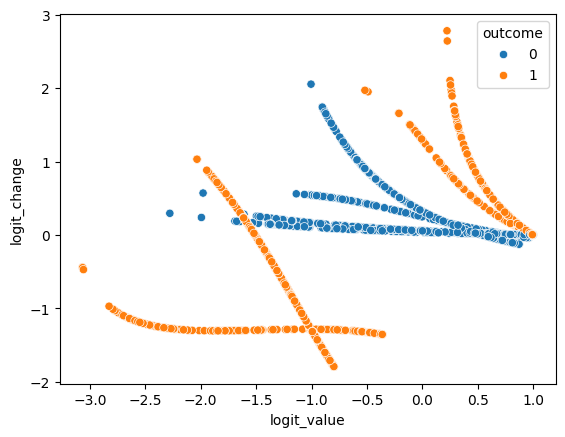

<Axes: xlabel='gate_reset_1', ylabel='gate_update_1'>

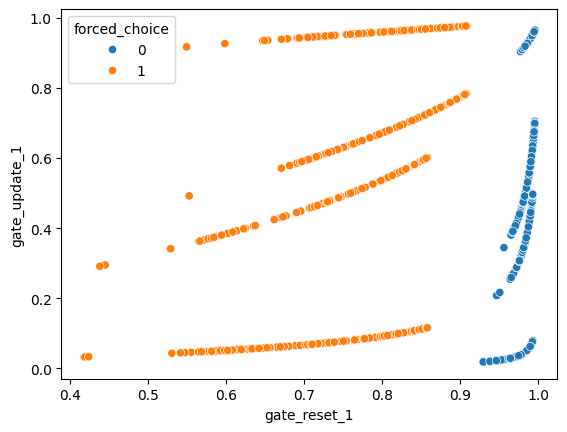

In [40]:
import seaborn as sns
trials_results['trial_type'] = trials_results['choice'] * 2 + trials_results['outcome']
sns.scatterplot(trials_results, x= 'logit_value',y='logit_change', hue='outcome')
plt.show()
sns.scatterplot(trials_results, x='gate_reset_1', y = 'gate_update_1', hue = 'forced_choice')

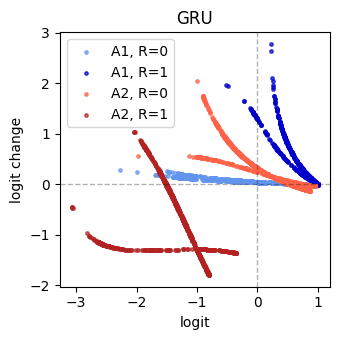

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_phase_portrait_direct(trials_results, s=6, alpha=0.7):
    """
    Plots the phase portrait directly from existing DataFrame columns:
    x = logit_value, y = logit_change.
    """
    # --- 1. Prepare data by dropping rows with no logit_change ---
    #df = trials_results.query('forced_choice == 0')
    df = trials_results
    df = df.dropna(subset=['logit_value', 'logit_change']).copy()

    # --- 2. Directly use columns to create trial types for coloring ---
    # A1,R=0 -> 0; A1,R=1 -> 1; A2,R=0 -> 2; A2,R=1 -> 3
    df['trial_type'] = df['choice'] * 2 + df['outcome']

    colors = ["cornflowerblue", "mediumblue", "tomato", "firebrick"]

    # --- 3. Plotting ---
    plt.figure(figsize=(3.5, 3.5))

    for tt in range(4):
        mask = (df['trial_type'] == tt)
        label = f'A{tt//2 + 1}, R={tt%2}' # e.g., A1, R=0
        plt.scatter(df.loc[mask, 'logit_value'], df.loc[mask, 'logit_change'],
                    c=colors[tt], s=s, alpha=alpha, label=label)

    # --- 4. Formatting ---

    # Reference lines
    plt.axhline(0, color='k', alpha=0.3, linewidth=1, linestyle='--')
    plt.axvline(0, color='k', alpha=0.3, linewidth=1, linestyle='--')

    plt.xlabel("logit")
    plt.ylabel("logit change")
    plt.title("GRU")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Usage ---
plot_phase_portrait_direct(trials_results)

In [ ]:
df = dataset.subject_df[]
df['trial_type']

In [16]:
# Extract trial-wise data for visualisation
trials_results = pd.read_csv('.data/rnns/GRU/2_unit_GRU_trials_data.htsv', sep='\t')
trials_inputs = dataset.inputs.reshape(-1, 3).numpy().astype(int)
trials_results.loc[:, ["forced_choice","outcome", "choice"]] = trials_inputs # "forced_choice","outcome","choice"
trials_results

FileNotFoundError: [Errno 2] No such file or directory: '.data/rnns/GRU/2_unit_GRU_trials_data.htsv'